In [2]:
import pandas as pd
import numpy as np
import os

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols

import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error

# import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [3]:
folder   = 'f:/files/python/jupyter/trial2-data/'

happiness_2015 = pd.read_csv(folder + 'world_happiness_2015.csv')
happiness_2015.columns = ['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 
                          'economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'dystopia_residual']
dropped_2015       = ['region', 'standard_error']
new_happiness_2015 = happiness_2015.drop(dropped_2015, axis = 1)
new_happiness_2015.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness_2016 = pd.read_csv(folder + 'world_happiness_2016.csv')
happiness_2016.columns = ['country', 'region', 'happiness_rank', 'happiness_score', 'lower_confidence', 'upper_confidence', 
                          'economy', 'family', 'health', 'freedom', 'trust', 'generosity', 'dystopia_residual']
dropped_2016       = ['region', 'lower_confidence', 'upper_confidence']
new_happiness_2016 = happiness_2016.drop(dropped_2016, axis = 1)
new_happiness_2016.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
happiness_2017 = pd.read_csv(folder + 'world_happiness_2017.csv')
happiness_2017.columns = ['country', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 
                          'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'dystopia_residual']
dropped_2017       = ['whisker_high', 'whisker_low']
new_happiness_2017 = happiness_2017.drop(dropped_2017, axis = 1)
new_happiness_2017.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
#concatenate 3 data
frames    = [new_happiness_2015, new_happiness_2016, new_happiness_2017]
happiness = pd.concat(frames, sort = False)

happiness.to_csv(folder + 'happiness.csv', encoding = 'utf-8')
happiness.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data = dict(type         = 'choropleth',
            locations    = happiness['country'],
            locationmode = 'country names',
            z            = happiness['happiness_rank'],
            text         = happiness['country'],
            colorscale   = 'Viridis')

layout = dict(title = "Happiness Rank Across the World")
fig    = go.Figure(data = [data], layout = layout)
iplot(fig)

In [8]:
trace4 = go.Scatter(x    = happiness.happiness_score,
                    y    = happiness.happiness_rank,
                    mode = 'markers')

data4  = [trace4]
layout = go.Layout(title = "Happiness Rank Determined by Score",
                   xaxis = dict(title     = "Happiness Score",
                                titlefont = dict(family = 'Courier New, monospace', 
                                                 size   = 18,
                                                 color  = '#7f7f7f')),
                   yaxis = dict(title     = "Happiness Rank",
                                titlefont = dict(family = 'Courier New, monospace',
                                                 size   = 18,
                                                 color  = '#7f7f7f')))

fig4 = go.Figure(data = data4, layout = layout)
iplot(fig4)

Dissect the graph : 
- Happiness score determines how the country is ranked, so happiness score as predictor and the happiness rank as the dependent variable
- The higher the score the lower the numerical rank, and higher the happiness rating
- Therefore, happiness score and rank are negatively correlated (as score increases, rank decreases)

In [9]:
drop_rank = happiness.drop("happiness_rank", axis = 1)

corr_matrix_happy = drop_rank.corr()
trace_corr_happy  = go.Heatmap(z = np.array(corr_matrix_happy),
                               x = corr_matrix_happy.columns,
                               y = corr_matrix_happy.columns)
data_happy = [trace_corr_happy]
iplot(data_happy)

In [10]:
drop_happy = happiness.drop(['country', 'happiness_rank'], axis = 1)
drop_happy.head()

,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
x = drop_happy.drop(['happiness_score'], axis = 1) #to keep independent variables
y = drop_happy['happiness_score'] #dependent variables

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred    = lm.predict(x_test)
result_lm = pd.DataFrame({'Actual'  : y_test,
                          'Predict' : y_pred})

result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
44,5.995,5.995052,-0.000052
66,5.615,5.615420,-0.000420
137,3.875,3.874587,0.000413
156,2.905,2.904540,0.000460
134,4.028,4.028300,-0.000300


In [14]:
print("estimated intercept is", lm.intercept_)
print('the number of coefficients in this model are', lm.coef_)

estimated intercept is 7.44647287937994e-05
the number of coefficients in this model are [1.00015173 0.99995696 0.99978064 0.99987679 0.99975951 1.00027341
 0.99998631]


In [15]:
coef    = zip(x.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'coefficients'])
coef_df

,features,coefficients
0,economy,1.000152
1,family,0.999957
2,health,0.999781
3,freedom,0.999877
4,trust,0.999760
5,generosity,1.000273
6,dystopia_residual,0.999986


In [17]:
from sklearn.metrics import mean_absolute_error
%matplotlib inline

print('Mean Absolute Error:',     mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',      mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

#variance score : 1 is perfect prediction
print('variance score: %.2f' % lm.score(x_test, y_test))

Mean Absolute Error: 0.0002628331340942512
Mean Squared Error: 9.027011800992407e-08
Root Mean Squared Error: 0.0003004498593940827
variance score: 1.00


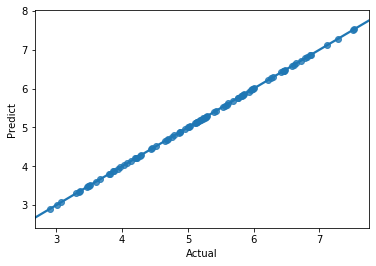

In [19]:
import seaborn as sns
%matplotlib inline

sns.regplot(x = 'Actual', y = 'Predict', data = result_lm)

The multiple linear regression model for Happines Score are 

Happiness score = (0.000074464) +               #from intercept value
                    (1.000152 * Economy) +      #from economy's coefficients value
                    (0.999957 * Family) +       #from family's coefficients value
                    (0.999781 * Health) +       #from health's coefficients value
                    (0.999877 * Freedom) +      #from freedom's coefficients value
                    (0.000760 * Trust) +        #from trust's coefficients value
                    (1.000273 * Generosity) +   #from generosity's coefficients value
                    (0.999986 * Dystopia) +     #from distopia residual's coefficients value